# Laboratorio 4 

#### Javier Valle 20159

In [1]:
# Imports necesarios.
import numpy as np
import matplotlib.pyplot as plt
import linreg as l
import quad as q

# Task 1.1: Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.


In [2]:
# Abriendo el csv.
data = np.genfromtxt('framingham.csv', delimiter=',')

# Quitando la fila de los nan.
data = data[1:, :]

# Imprimiendo los datos.
print(data)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


# Task 1.2: Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

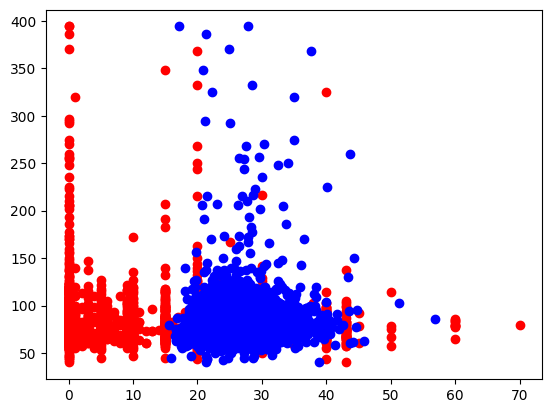

In [3]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# Fuma o no.
X = data[:,4]

# sufrió o no un paro cardíaco.
y = data[:,14]

# Heartrate.
x = data[:,12]

# Sufrió o no un paro cardíaco.
y = data[:,14]

# Graficando si fuma vs si tuvo algún problema cardiovascular.
plt.scatter(X, y, color="red")
plt.scatter(x, y, color="blue")
plt.show()



# Task 1.3: Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase)

X:  [[ 0.]
 [ 0.]
 [20.]
 ...
 [20.]
 [15.]
 [ 0.]]
X:  4209
y:  [[ 77.]
 [ 76.]
 [ 70.]
 ...
 [ 68.]
 [ 86.]
 [107.]]
y:  3850
t:  [[0.55463022]
 [0.20194777]]
t:  [[0.55477543]
 [0.20319209]]
t:  [[0.55492061]
 [0.20443586]]
t:  [[0.55506577]
 [0.20567906]]
t:  [[0.55521091]
 [0.20692171]]
t:  [[0.55535603]
 [0.2081638 ]]
t:  [[0.55550112]
 [0.20940534]]
t:  [[0.55564619]
 [0.21064631]]
t:  [[0.55579123]
 [0.21188674]]
t:  [[0.55593626]
 [0.2131266 ]]
t:  [[0.55608126]
 [0.21436591]]
t:  [[0.55622624]
 [0.21560466]]
t:  [[0.55637119]
 [0.21684286]]
t:  [[0.55651613]
 [0.21808051]]
t:  [[0.55666104]
 [0.2193176 ]]
t:  [[0.55680593]
 [0.22055413]]
t:  [[0.55695079]
 [0.22179011]]
t:  [[0.55709564]
 [0.22302553]]
t:  [[0.55724046]
 [0.22426041]]
t:  [[0.55738526]
 [0.22549472]]
t:  [[0.55753003]
 [0.22672849]]
t:  [[0.55767479]
 [0.2279617 ]]
t:  [[0.55781952]
 [0.22919436]]
t:  [[0.55796423]
 [0.23042646]]
t:  [[0.55810891]
 [0.23165802]]
t:  [[0.55825358]
 [0.23288902]]
t:  [[0.558398

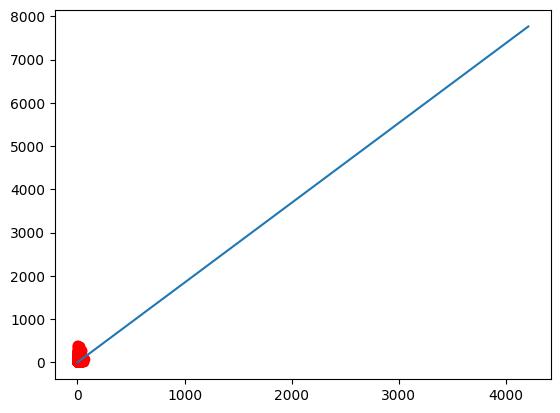

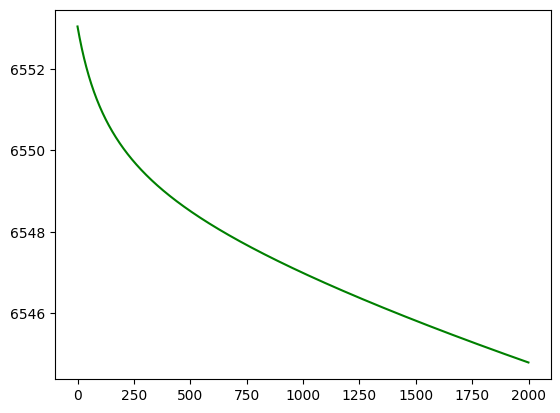

In [4]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)
# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000001,
    n=2000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# Costo.
plt.plot(costs, color="green")
plt.show()

# 1.4: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

# Polinomio grado 1

In [5]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 1
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00001,
    n=10000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 1
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()

X:  [[ 0.]
 [ 0.]
 [20.]
 ...
 [20.]
 [15.]
 [ 0.]]
X:  4209
y:  [[ 77.]
 [ 76.]
 [ 70.]
 ...
 [ 68.]
 [ 86.]
 [107.]]
y:  3850
t:  [[0.84618736]
 [0.89668159]
 [0.68784542]]
t:  [[0.84738464]
 [0.90290295]
 [0.69406678]]
t:  [[0.84857965]
 [0.90906857]
 [0.7002324 ]]
t:  [[0.84977241]
 [0.91517895]
 [0.70634278]]
t:  [[0.85096295]
 [0.92123458]
 [0.71239841]]
t:  [[0.85215129]
 [0.92723596]
 [0.71839979]]
t:  [[0.85333744]
 [0.93318356]
 [0.72434739]]
t:  [[0.85452143]
 [0.93907788]
 [0.7302417 ]]
t:  [[0.85570327]
 [0.94491937]
 [0.7360832 ]]
t:  [[0.85688298]
 [0.95070852]
 [0.74187235]]
t:  [[0.85806058]
 [0.95644579]
 [0.74760962]]
t:  [[0.8592361 ]
 [0.96213165]
 [0.75329548]]
t:  [[0.86040954]
 [0.96776655]
 [0.75893038]]
t:  [[0.86158093]
 [0.97335096]
 [0.76451479]]
t:  [[0.86275028]
 [0.97888531]
 [0.77004914]]
t:  [[0.86391762]
 [0.98437007]
 [0.7755339 ]]
t:  [[0.86508296]
 [0.98980566]
 [0.78096949]]
t:  [[0.86624632]
 [0.99519254]
 [0.78635637]]
t:  [[0.86740772]
 [1.0005

# Polinomio grado 2

X:  [[ 0.]
 [ 0.]
 [20.]
 ...
 [20.]
 [15.]
 [ 0.]]
X:  4209
y:  [[ 77.]
 [ 76.]
 [ 70.]
 ...
 [ 68.]
 [ 86.]
 [107.]]
y:  3850
t:  [[0.52030419]
 [0.68829009]
 [0.20305274]]
t:  [[0.5203042 ]
 [0.68828992]
 [0.20304565]]
t:  [[0.5203042 ]
 [0.68828976]
 [0.20303855]]
t:  [[0.52030421]
 [0.68828959]
 [0.20303145]]
t:  [[0.52030421]
 [0.68828942]
 [0.20302436]]
t:  [[0.52030422]
 [0.68828925]
 [0.20301726]]
t:  [[0.52030422]
 [0.68828908]
 [0.20301017]]
t:  [[0.52030423]
 [0.68828891]
 [0.20300307]]
t:  [[0.52030423]
 [0.68828875]
 [0.20299598]]
t:  [[0.52030424]
 [0.68828858]
 [0.20298888]]
t:  [[0.52030424]
 [0.68828841]
 [0.20298179]]
t:  [[0.52030424]
 [0.68828824]
 [0.2029747 ]]
t:  [[0.52030425]
 [0.68828807]
 [0.2029676 ]]
t:  [[0.52030425]
 [0.6882879 ]
 [0.20296051]]
t:  [[0.52030426]
 [0.68828774]
 [0.20295342]]
t:  [[0.52030426]
 [0.68828757]
 [0.20294632]]
t:  [[0.52030427]
 [0.6882874 ]
 [0.20293923]]
t:  [[0.52030427]
 [0.68828723]
 [0.20293214]]
t:  [[0.52030428]
 [0.6882

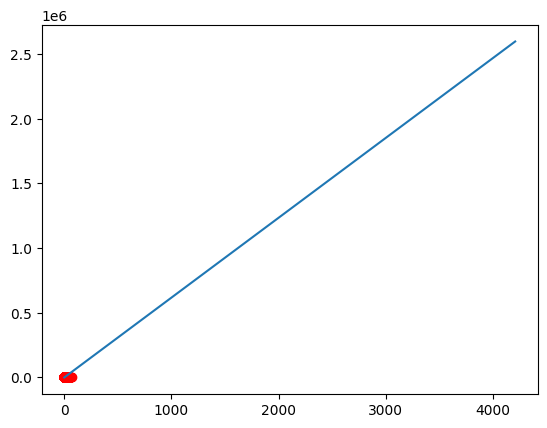

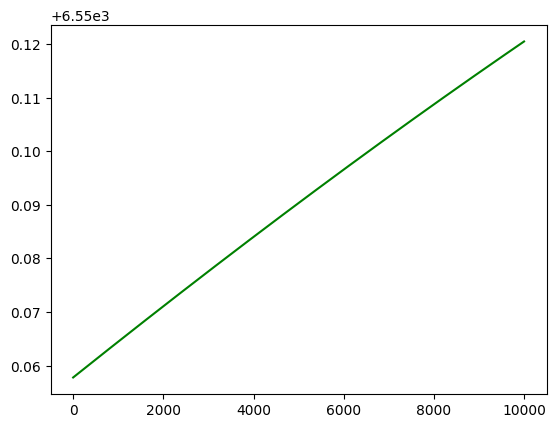

In [ ]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13). Variable independiente: BMI. (Posición 12)

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 2
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000001,
    n=10000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 2
))

ym = xmr @ tf # Pendiente de la recta a utilizar.


# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()

# Polinomio grado 3

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 3
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 3
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio grado 4

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 4
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 4
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio grado 5

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 5
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 5
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio grado 6

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 6
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000000000000000001,
    n=1000
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 6
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 7

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 7
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 7
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 8

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 8
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 8
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 9

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 9
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 9
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 10

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 10
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 10
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 11

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 11
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 11
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 12

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 12
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 12
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 13

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 13
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.00000000000000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 13
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 14

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 14
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.000000000000000000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 14
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# Polinomio de grado 15

In [ ]:
# Polinomio grado 3

# Manipulando los datos.

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

# # Igualando el tamaño de X y y.
# X = X[:len(y)]
# y = y[:len(X)]

print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))


# # Calculando Xr.
# Xr = np.hstack((
#     np.ones((len(X), 1)),
#     X
# ))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 15
))

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

to = to[~np.isnan(to)]

# Haciendo reshape a to.
to = to.reshape((len(to), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    to,
    q.cost,
    q.grad,
    a=0.0000000000000000000000000000000000000000000000000000001,
    n=1500
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Aumentando el tamaño de xmr de 2 a 3.
xmr = np.hstack((
    xmr,
    xmr[:, 1].reshape((xmr.shape[0], 1)) ** 15
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# print("ym: ", ym)
# print("xmr: ", xmr)
# print("xm: ", xm)
# print("tf: ", tf)

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

# # Costo.
plt.plot(costs, color="green")
plt.show()


# 1.5: Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).


#### A lo largo del desarrollo del presente laboratorio se logró notar que existe una fuerte relación entre las variables que indican si el paciente es fumador o no y si el paciente sufrió un infarto o no. Asimismo, se notó que había bastante información útil entre los datos de la condición del corazón del paciente y si el mismo sufrió o no un infarto a lo largo de su vida. Por otro lado, se logró notar que el grado polinomial que mejor describe la nube de puntos es de uno. Lo anterior quiere decir que una recta podría ayudar a describir de una buena manera los datos del dataset para futuros análisis.